In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')


#Importing Data

diabetes = pd.read_csv(r'C:\Users\Connor\Documents\IntroToMLHW\HW3\diabetes.csv')


#Generating training and verification sets

random = np.random.seed(45)
df_train, df_test = train_test_split(diabetes, train_size = 0.8, test_size = 0.2, random_state = random)
m = len(df_train)
n = len(df_test)


diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Accuracy: 0.7272727272727273
Recall: 0.66
Precision: 0.5689655172413793


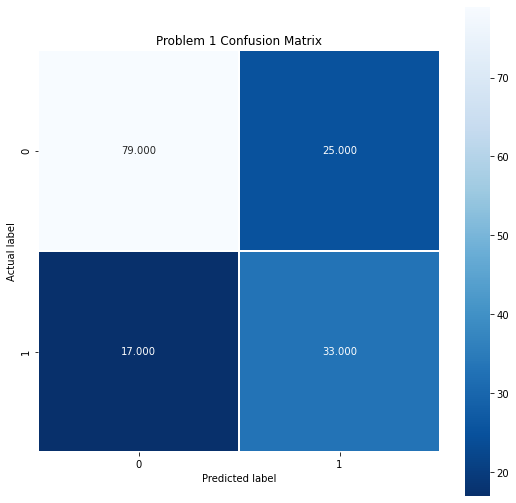

In [2]:
#Training for Problem 1

logisticRegr = LogisticRegression()
scaler = MinMaxScaler()

varlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

diabetesTrain1 = df_train[varlist]
diabetesTest1 = df_test[varlist]

#Normalization 

diabetesTrain1[varlist] = scaler.fit_transform(diabetesTrain1[varlist]) 
diabetesTest1[varlist] = scaler.fit_transform(diabetesTest1[varlist]) 

yTrain = diabetesTrain1.pop('Outcome')
xTrain = diabetesTrain1

yTest = diabetesTest1.pop('Outcome')
xTest = diabetesTest1

#Running logistic regression

logisticRegr.fit(xTrain, yTrain)

predictions = logisticRegr.predict(diabetesTest1)

cm = metrics.confusion_matrix(yTest, predictions)

#Plotting confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Problem 1 Confusion Matrix')


#Calculation of Accuracy, Precision, Recall

TP = 33
TN = 79
FP = 25
FN = 17

print("Accuracy: " + str((TP + TN) / (TP + TN + FP + FN)))
print("Recall: " + str(TP / (TP + FN)))
print("Precision: " + str(TP / (TP + FP)))        


Accuracy: 0.7402597402597403
Recall: 0.6
Precision: 0.6


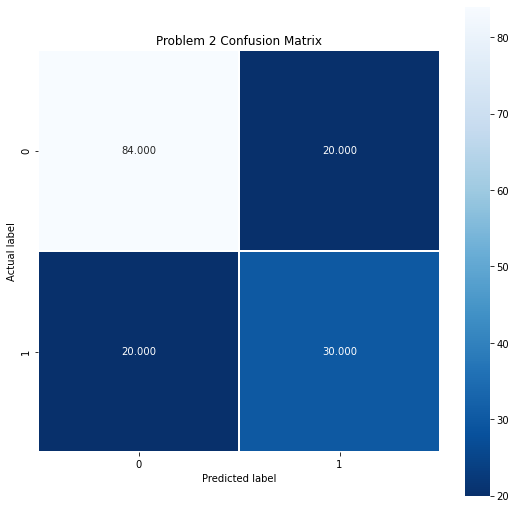

In [3]:
#Training for Problem 2

gnb = GaussianNB();
scaler = MinMaxScaler()

varlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

diabetesTrain2 = df_train[varlist]
diabetesTest2 = df_test[varlist]

#Normalization 

diabetesTrain1[varlist] = scaler.fit_transform(diabetesTrain2[varlist]) 
diabetesTest1[varlist] = scaler.fit_transform(diabetesTest2[varlist]) 

yTrain = diabetesTrain2.pop('Outcome')
xTrain = diabetesTrain2

yTest = diabetesTest2.pop('Outcome')
xTest = diabetesTest2

#Running GNB

gnb.fit(xTrain, yTrain)

predictions = gnb.predict(xTest)

#Plotting confusion matrix

cm = metrics.confusion_matrix(yTest, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Problem 2 Confusion Matrix')


#Calculation of Accuracy, Precision, Recall]

TP = 30
TN = 84
FP = 20
FN = 20

print("Accuracy: " + str((TP + TN) / (TP + TN + FP + FN)))
print("Recall: " + str(TP / (TP + FN)))
print("Precision: " + str(TP / (TP + FP)))       


In [4]:
#Training for Problem 3

logisticRegr = LogisticRegression()
kf = KFold(n_splits=5)
scaler = MinMaxScaler()

varlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

diabetesData = diabetes[varlist]

#Normalization

diabetesData[varlist] = scaler.fit_transform(diabetesData[varlist]) 

Y = diabetesData.pop('Outcome')
X = diabetesData


#Run K-fold

scores = cross_val_score(logisticRegr, X, Y, scoring='accuracy', cv=kf, n_jobs=-1)


#K-fold accuracy and standard deviation calculation

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

kf = KFold(n_splits=10)

scores = cross_val_score(logisticRegr, X, Y, scoring='accuracy', cv=kf, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))



Accuracy: 0.762 (0.040)
Accuracy: 0.768 (0.048)


In [5]:
#Training for problem 4

gnb = GaussianNB();
kf = KFold(n_splits=5)
scaler = MinMaxScaler()

varlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

diabetesData = diabetes[varlist]

#Normalization

diabetesData[varlist] = scaler.fit_transform(diabetesData[varlist]) 

Y = diabetesData.pop('Outcome')
X = diabetesData


#Run K-fold

scores = cross_val_score(gnb, X, Y, scoring='accuracy', cv=kf, n_jobs=-1)


#K-fold accuracy and standard deviation calculation

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

kf = KFold(n_splits=10)

scores = cross_val_score(gnb, X, Y, scoring='accuracy', cv=kf, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))



Accuracy: 0.753 (0.029)
Accuracy: 0.755 (0.043)
